In [61]:
# Cargar datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\LAURA\Downloads\archive\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file_path)

In [63]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [65]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [103]:
# What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
df_category = df['category'].value_counts().sort_values(ascending=False)
df_category = pd.DataFrame(df_category)
df_category.head(10)

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
Manicure & Pedicure Products,18940
Skin Care,18769
Make-up,18756
Hair Care,18735


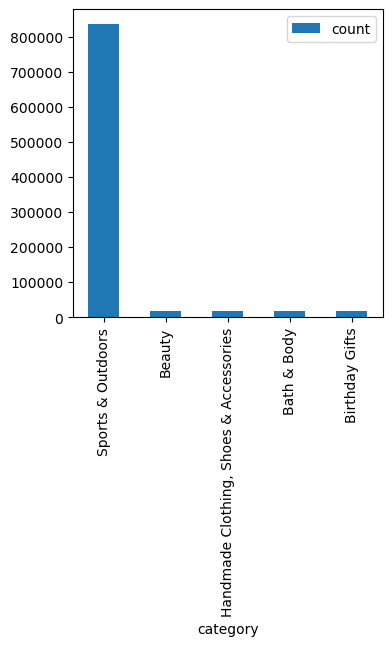

In [109]:
top_5_categories = df_category.head(5)
fig = top_5_categories.plot.bar(figsize=(4,4))

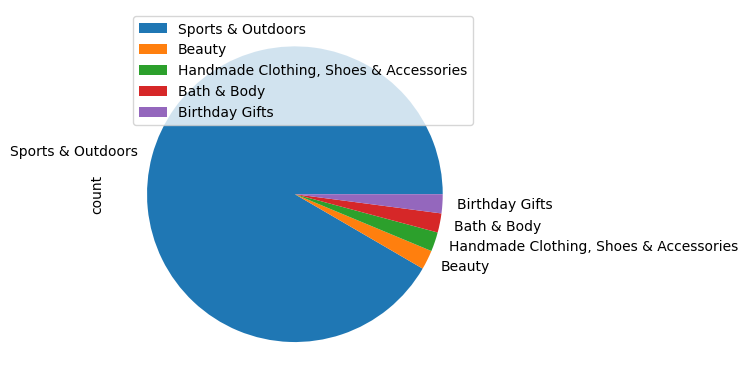

In [117]:
fig = top_5_categories.plot.pie(subplots=True)

In [133]:
# How are products priced on Amazon UK, and are there specific price points or ranges that are more common?
price_mean = df['price'].mean()
price_med = df['price'].median()
price_mode = df['price'].mode()
price_std = df['price'].std()
price_var = df['price'].var()
price_min = df['price'].min()
price_max = df['price'].max()

print(f'Price std: {price_std}\nPrice var: {price_var}\nPrice min: {price_min}\nPrice max: {price_max}')

print(f"Price mean: {price_mean} \nPrice median: {price_med} \nPrice mode: {price_mode}")

Price std: 345.60886175352226
Price var: 119445.48532256528
Price min: 0.0
Price max: 100000.0
Price mean: 89.24380943923663 
Price median: 19.09 
Price mode: 0    9.99
Name: price, dtype: float64


In [ ]:
'''
The mean price of $89.24 provides an average value for products in the dataset.
A median price of $19.09 suggests a central tendency lower than the mean, hinting at a potential skew in the distribution towards lower values.
The mode price of $9.99 indicates that this price point occurs most frequently within the datas
'''

In [ ]:
'''
The standard deviation of 345.61 indicates a considerable spread in prices around the mean.
With a variance of 119445.49, prices exhibit significant variability within the dataset.
The presence of a minimum price of $0.0 suggests the availability of free or extremely low-cost items.
The maximum price of $100,000.0 highlights the existence of high-value products on Amazon.
'''

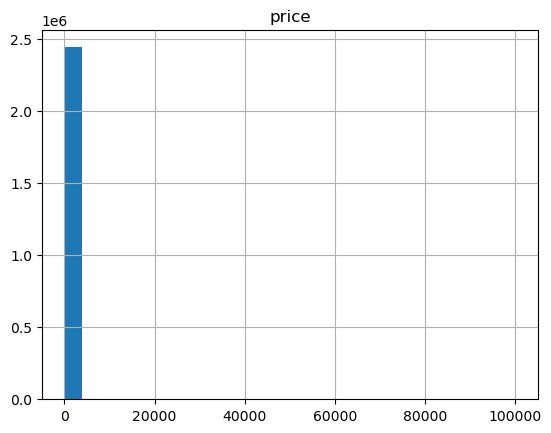

In [129]:
ax=df.hist(column='price', bins=25)

<Axes: ylabel='Count'>

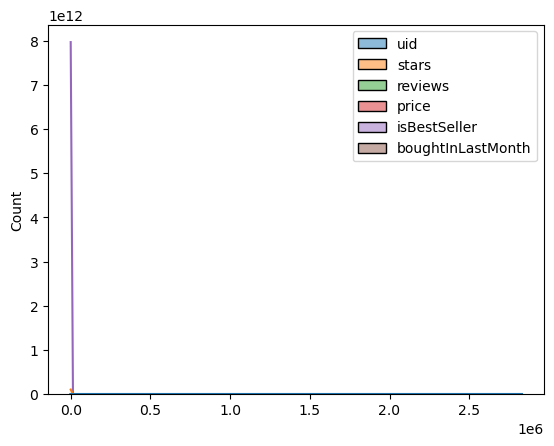

In [131]:
sns.histplot(df[df['price']<200], kde=True, bins=100, color="blue")

In [132]:
reviews_mean = df['stars'].mean()
reviews_med = df['stars'].median()
reviews_mode = df['stars'].mode()
reviews_std = df['stars'].std()
reviews_var = df['stars'].var()
reviews_min = df['stars'].min()
reviews_max = df['stars'].max()

print(f'reviews std: {reviews_std}\nreviews var: {reviews_var}\nreviews min: {reviews_min}\nreviews max: {reviews_max}')

print(f"reviews mean: {reviews_mean} \nreviews median: {reviews_med} \nreviews mode: {reviews_mode}")

reviews std: 2.1948653785054697
reviews var: 4.81743402976196
reviews min: 0.0
reviews max: 5.0
reviews mean: 2.152836472966065 
reviews median: 0.0 
reviews mode: 0    0.0
Name: stars, dtype: float64


In [147]:
q1 = df['stars'].quantile(0.25)
q3 = df['stars'].quantile(0.75)
print(f"reviews 25%: {q1} \nreviews 75%: {q3}")

reviews 25%: 0.0 
reviews 75%: 4.4


In [151]:
review_skew=df['stars'].skew()
review_kurt = df['stars'].kurtosis()
print(review_skew)
print(review_kurt)

0.08120735761080985
-1.9260061280432985


In [153]:
'''
Reviews(stars) distribution is moderately skewed positevely. It meanse that there are many outliers above mode affecting mean.
Negative kurtosis indicates flat distribution.

'''

'\nReviews(stars) distribution is moderately skewed positevely. It meanse that there are many outliers above mode affecting mean.\nNegative kurtosis indicates flat distribution.\n'

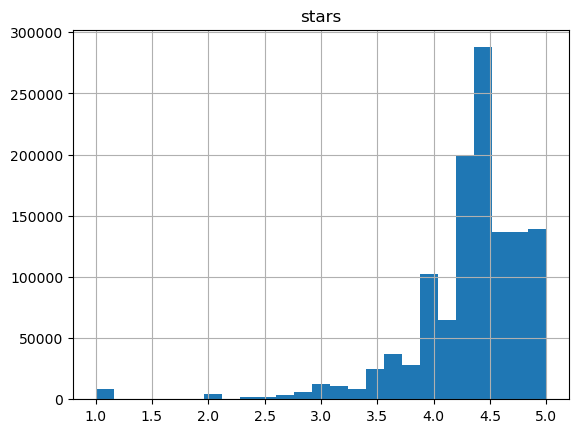

In [155]:
df=df[df['stars'] >0]
ax2=df.hist(column='stars', bins=25)